In [26]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image
from imblearn.over_sampling import SMOTE



In [10]:
# Non-normalised data
df_outliers = pd.read_csv('../Final_Data_Set/Original Dataset with Outliers Included.csv')
df_no_outliers = pd.read_csv('../Final_Data_Set/Original Dataset without Outliers.csv')

# Normalised data
# df_no_outliers = pd.read_excel('../Data_Set/new_df_without_outliers_copy_smote_resampled.xlsx')
# df_outliers = pd.read_excel('../Data_Set/new_df_outliers_only_copy_smote_resampled.xlsx')

In [11]:
df_no_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,0,-0.247356,-0.128959
1,54.0,0,0,27.32,6.6,80,0,-0.247356,-0.128959
2,28.0,0,0,27.32,5.7,158,0,-0.247356,0.160772
3,36.0,0,0,23.45,5.0,155,0,0.452953,-0.128959
4,76.0,1,1,20.14,4.8,155,0,0.452953,0.160772
...,...,...,...,...,...,...,...,...,...
96303,80.0,0,0,27.32,6.2,90,0,-0.247356,-0.128959
96304,2.0,0,0,17.37,6.5,100,0,-0.247356,-0.128959
96305,66.0,0,0,27.83,5.7,155,0,0.452953,0.160772
96306,24.0,0,0,35.42,4.0,100,0,-0.247356,-0.128959


In [3]:
# df_no_outliers['bmi'] = df_no_outliers['bmi'].round().astype(int)
# df_no_outliers['age'] = df_no_outliers['age'].round().astype(int)

# df_no_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,1,0,1,-1,0.629251,-0.317312,0.263730,-0.974068,0
1,0,0,0,0,0.629251,-1.649552,-1.579747,-0.974068,0
2,-1,0,0,0,-0.272192,0.082360,0.263730,1.211318,0
3,-1,0,0,-1,-0.973313,0.015748,0.331039,-0.974068,0
4,1,1,1,-1,-1.173634,0.015748,0.331039,1.211318,0
...,...,...,...,...,...,...,...,...,...
181139,1,0,0,0,0.979109,-0.628168,1.103451,1.211318,1
181140,1,0,0,0,-0.172031,0.015748,0.624467,-0.399610,1
181141,-1,0,0,0,1.025419,0.104564,0.763605,1.211318,1
181142,0,0,0,0,0.045409,0.015748,-1.579747,1.211318,1


In [4]:
# df_outliers['bmi'] = df_outliers['bmi'].round().astype(int)
# df_outliers['age'] = df_outliers['age'].round().astype(int)
# df_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,0,0,0,1,-0.357602,-1.154539,1.806645,-0.777719,0
1,-1,0,0,1,-0.233789,0.206884,-0.280453,-0.777719,0
2,1,0,0,2,1.375782,-0.405756,-0.280453,-0.777719,1
3,-1,0,0,1,-0.048069,-0.746112,-0.280453,1.417943,0
4,-1,0,0,1,-0.357602,-1.154539,-1.553924,-0.777719,0
...,...,...,...,...,...,...,...,...,...
6163,0,0,0,0,-0.410728,-0.364914,-0.280453,-0.777719,0
6164,-1,0,0,0,-1.100480,-0.786955,-1.030285,-0.777719,0
6165,-2,0,0,1,-0.225281,-1.399595,-1.009532,-0.777719,0
6166,-1,0,0,1,-0.108843,-0.405756,-1.133316,-0.052526,0


In [12]:
X_no_outliers = df_no_outliers.drop('diabetes', axis=1)
y_no_outliers = df_no_outliers['diabetes']

X_outliers = df_outliers.drop('diabetes', axis=1)
y_outliers = df_outliers['diabetes']

In [13]:
X_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813
...,...,...,...,...,...,...,...,...
99977,1.692577,0,0,-0.000114,0.628091,-1.180513,-0.640425,-0.841175
99978,-1.771458,0,0,-1.499326,0.908292,-0.934869,-0.640425,-0.841175
99979,1.070828,0,0,0.076730,0.161089,0.416175,1.561464,1.188813
99980,-0.794422,0,0,1.220350,-1.426718,-0.934869,-0.640425,-0.841175


In [15]:
y_outliers

0        0
1        0
2        0
3        0
4        0
        ..
99977    0
99978    0
99979    0
99980    0
99981    0
Name: diabetes, Length: 99982, dtype: int64

# Decision Tree without outliers

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

## SMOTE

In [34]:
# Create copies of df
new_df_without_outliers_copy = df_no_outliers.copy()
# columns_to_drop = ["gender", "smoking_history"]
# new_df_without_outliers_copy.drop(columns=columns_to_drop,inplace = True)

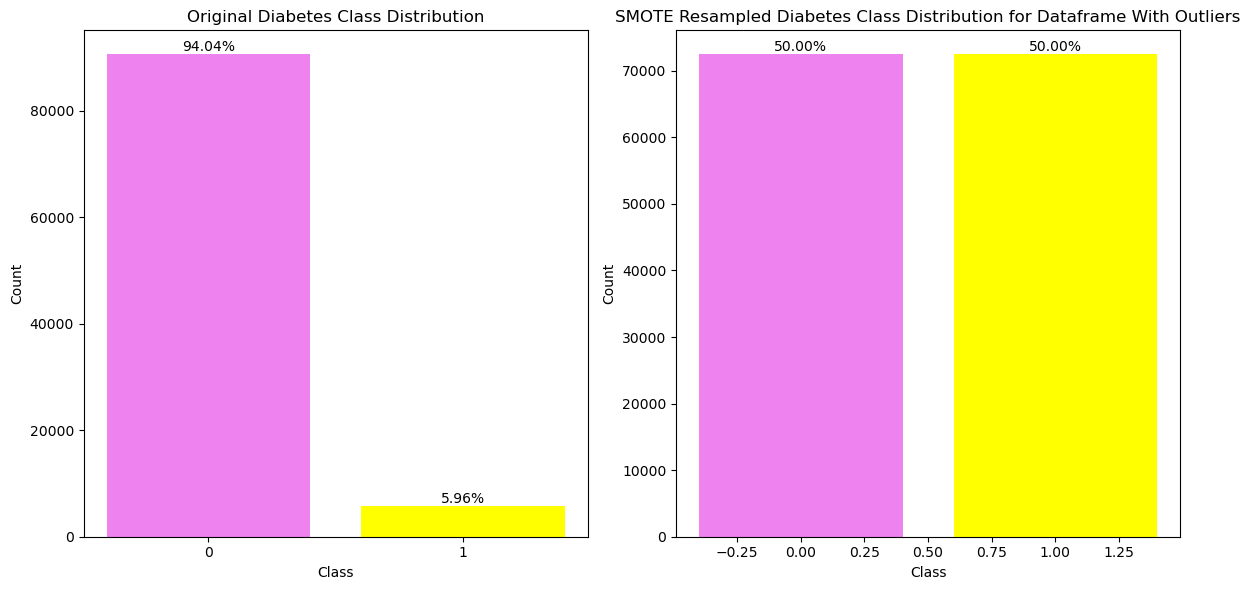

In [36]:

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df_without_outliers_copy["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df_without_outliers_copy) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_train_resampled).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_train_resampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe With Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [37]:
# Create a DataFrame from the SMOTE resampled data
new_df_without_outliers_copy_smote_resampled = pd.DataFrame(data=X_train_resampled, columns=X_train.columns)
new_df_without_outliers_copy_smote_resampled["diabetes"] = y_train_resampled

new_df_without_outliers_copy_smote_resampled



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,6.000000,0,0,25.590000,4.500000,90,-0.247356,0.160772,0
1,2.000000,0,0,18.840000,5.000000,158,-0.247356,-0.128959,0
2,21.000000,0,0,22.710000,6.600000,159,-0.247356,-0.128959,0
3,5.000000,0,0,27.320000,3.500000,145,-0.247356,-0.128959,0
4,7.000000,0,0,27.320000,6.200000,160,-0.247356,-0.128959,0
...,...,...,...,...,...,...,...,...,...
144895,58.000000,0,0,43.880784,6.880685,126,-0.247356,-0.128959,1
144896,51.755109,0,0,27.260620,5.773467,130,-0.247356,-0.058006,1
144897,36.367183,0,0,30.146539,7.227864,155,0.133803,-0.128959,1
144898,50.000000,0,0,24.527941,6.960666,160,0.452953,-0.012852,1


In [38]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# train model
dtree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.6666666666666666, 0.9, 'HbA1c_level <= 6.7\nentropy = 0.326\nsamples = 77046\nvalue = [72450, 4596]'),
 Text(0.5, 0.7, 'blood_glucose_level <= 210.0\nentropy = 0.237\nsamples = 75376\nvalue = [72450, 2926]'),
 Text(0.3333333333333333, 0.5, 'HbA1c_level <= 5.35\nentropy = 0.188\nsamples = 74595\nvalue = [72450, 2145]'),
 Text(0.16666666666666666, 0.3, 'entropy = 0.0\nsamples = 29871\nvalue = [29871, 0]'),
 Text(0.5, 0.3, 'age <= 50.5\nentropy = 0.278\nsamples = 44724\nvalue = [42579, 2145]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.118\nsamples = 28229\nvalue = [27779, 450]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.478\nsamples = 16495\nvalue = [14800, 1695]'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.0\nsamples = 781\nvalue = [0, 781]'),
 Text(0.8333333333333334, 0.7, 'entropy = 0.0\nsamples = 1670\nvalue = [0, 1670]')]

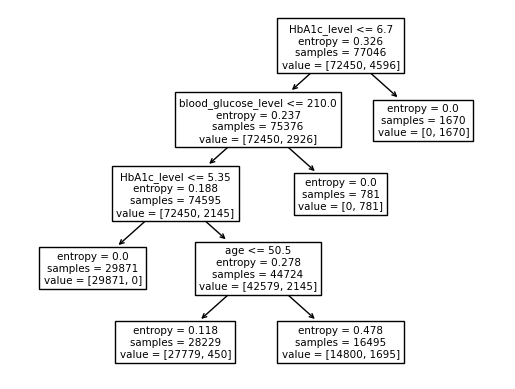

In [39]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_no_outliers.columns.tolist())

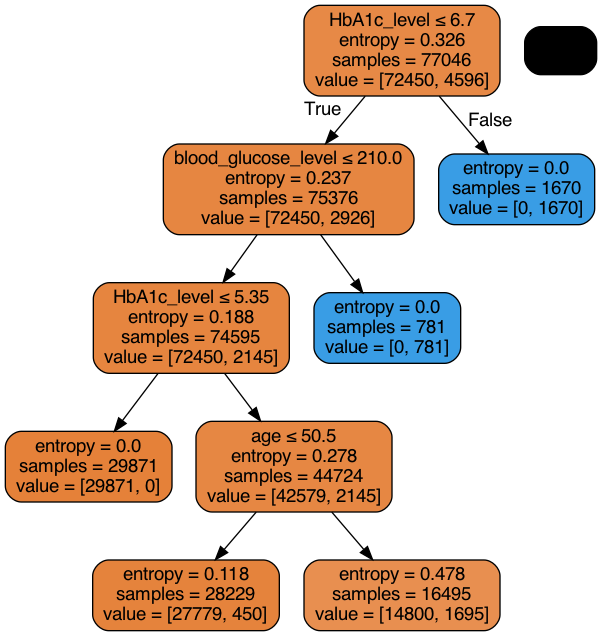

In [40]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

If an individual's HbA1c level is less than or equal to 5.35 -> low risk for diabetes.
High blood glucose levels typically lead to a higher predicted risk of diabetes.
Age can be a factor if HbA1c and blood glucose levels are borderline, being younger than 42.5 might have risk of diabetes

In [41]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
84454,0,0
79691,0,0
78875,0,0
65862,0,0
41442,1,1
69629,0,0
63274,0,0
75507,0,0
30922,0,0
51140,0,0


In [42]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[18122,   534],
       [    0,   606]])

In [43]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))


Accuracy: 0.9722770221160835

Precision: 1.0

Recall: 0.531578947368421

F1 score: 0.6941580756013745


<h3>Hyperparameter Tuning</h3>

In [48]:
# It will take around 7 minutes to run.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [200,300,400,500,600],
    'min_samples_leaf': [3000,3500,4000,4500],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
# evaluate the model

# def function to evaluate model
def evaluate_model(model):
    predictions = model.predict(X_train)
    print("Train Accuracy :", accuracy_score(y_train,predictions))
    print('\nPrecision:',precision_score(y_train, predictions))
    print('\nRecall:',recall_score(y_train, predictions))
    print('\nF1 score:',f1_score(y_train, predictions))
    
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, predictions))
    print("-"*50)
    
    predictions = model.predict(X_test)
    print("Test Accuracy :", accuracy_score(y_test, predictions))
    print('\nPrecision:',precision_score(y_test, predictions))
    print('\nRecall:',recall_score(y_test, predictions))
    print('\nF1 score:',f1_score(y_test, predictions))
    
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

# call function
evaluate_model(best_model)
#accuracy_score = best_model.score(X_test, y_test)
print('Best Parameters:',grid_search.best_params_,end='\n\n')
#print('accuracy:', accuracy_score)

Train Accuracy : 0.9403473249746904

Precision: 0.0

Recall: 0.0

F1 score: 0.0
Train Confusion Matrix:
[[72450     0]
 [ 4596     0]]
--------------------------------------------------
Test Accuracy : 0.9408161146298412

Precision: 0.0

Recall: 0.0

F1 score: 0.0
Test Confusion Matrix:
[[18122     0]
 [ 1140     0]]
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3000, 'min_samples_split': 200}



/Users/jeslintay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jeslintay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


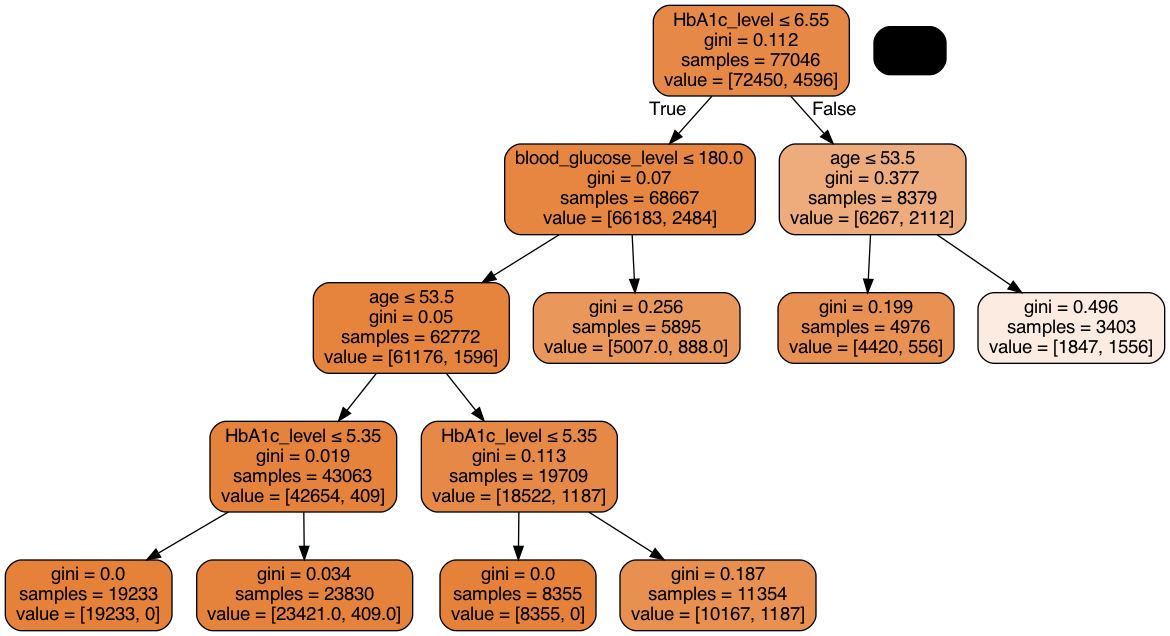

In [50]:
dot_data = StringIO()
export_graphviz(best_model, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [321]:
# check validation curve for over & under fitting
from sklearn.model_selection import validation_curve


# Decision Tree with outliers

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)

In [53]:
# Create copies of df
new_df_w_outliers_copy = df_outliers.copy()


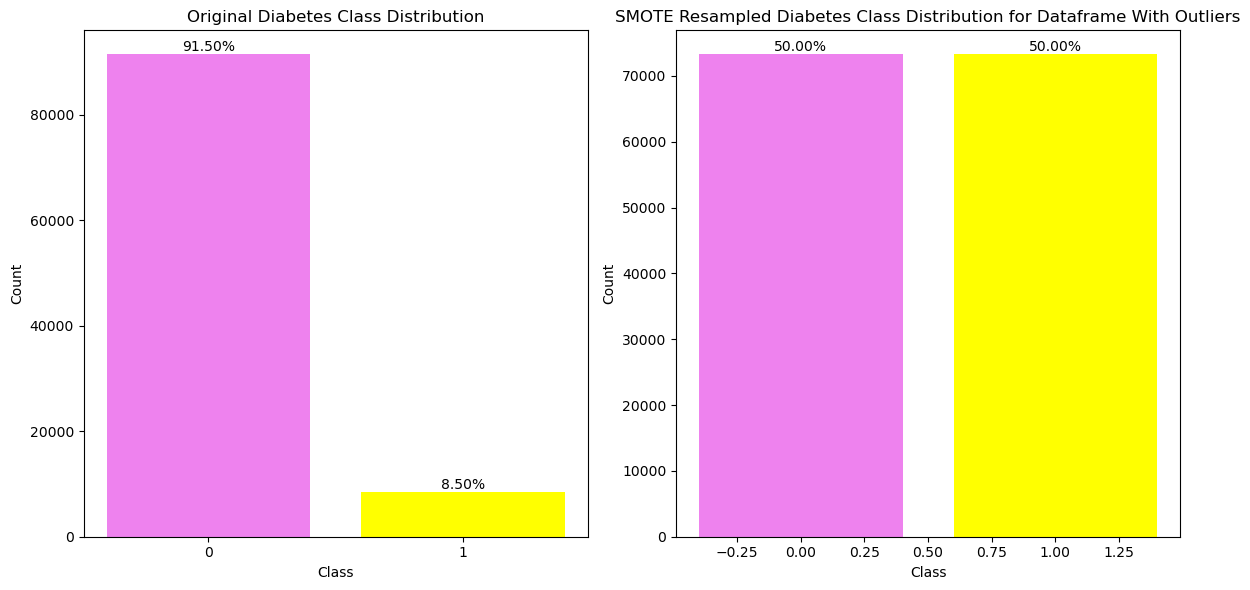

In [54]:

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df_w_outliers_copy["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df_w_outliers_copy) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_train_resampled).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_train_resampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe With Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [55]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# train model
dtree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.6666666666666666, 0.9, 'HbA1c_level <= 1.095\nentropy = 0.416\nsamples = 79985\nvalue = [73260, 6725]'),
 Text(0.5, 0.7, 'blood_glucose_level <= 1.767\nentropy = 0.273\nsamples = 76872\nvalue = [73260, 3612]'),
 Text(0.3333333333333333, 0.5, 'HbA1c_level <= -0.166\nentropy = 0.192\nsamples = 75490\nvalue = [73260, 2230]'),
 Text(0.16666666666666666, 0.3, 'entropy = 0.0\nsamples = 30282\nvalue = [30282, 0]'),
 Text(0.5, 0.3, 'age <= 0.027\nentropy = 0.284\nsamples = 45208\nvalue = [42978, 2230]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.088\nsamples = 23046\nvalue = [22790, 256]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.433\nsamples = 22162\nvalue = [20188.0, 1974.0]'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.0\nsamples = 1382\nvalue = [0, 1382]'),
 Text(0.8333333333333334, 0.7, 'entropy = 0.0\nsamples = 3113\nvalue = [0, 3113]')]

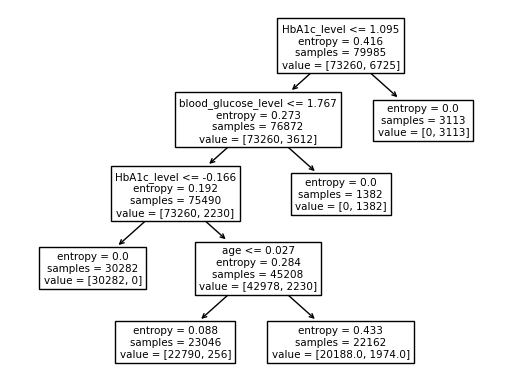

In [56]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_outliers.columns.tolist())

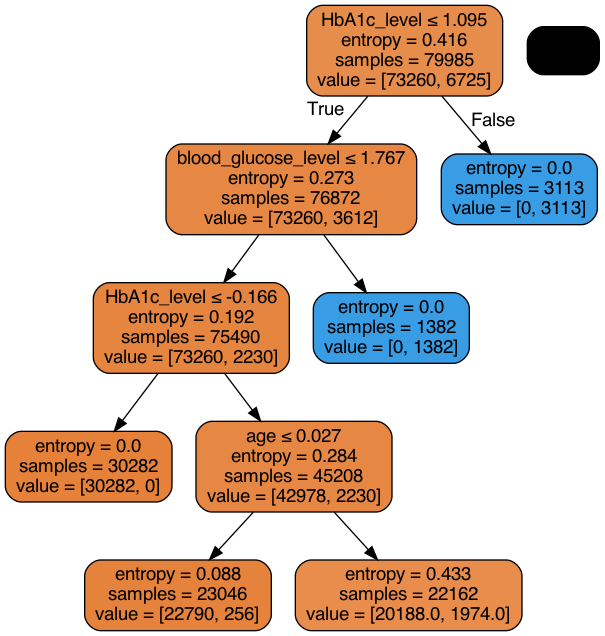

In [57]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Individuals with bmi less than 46.5 are diabetic...

In [58]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
72667,0,0
84102,0,0
19921,0,0
60093,0,0
67492,0,0
25197,0,0
41928,0,0
66757,0,0
64229,0,0
50644,0,0


In [59]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[18222,   583],
       [    0,  1192]])

In [60]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))
#dtree.score(X_test, y_test)

Accuracy: 0.9708456268440266

Precision: 1.0

Recall: 0.6715492957746478

F1 score: 0.80350522413212


<h3>Hyperparameter Tuning</h3>

In [61]:
# Faster at around 16secs
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [50,100,150,200,250],
    'min_samples_leaf': [50,100,150,200,250],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_train)

evaluate_model(best_model)
print('Best Parameters:',grid_search.best_params_,end='\n\n')

Train Accuracy : 0.9721197724573357

Precision: 1.0

Recall: 0.6684014869888476

F1 score: 0.8012477718360071
Train Confusion Matrix:
[[73260     0]
 [ 2230  4495]]
--------------------------------------------------
Test Accuracy : 0.9708456268440266

Precision: 1.0

Recall: 0.6715492957746478

F1 score: 0.80350522413212
Test Confusion Matrix:
[[18222     0]
 [  583  1192]]
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 50}



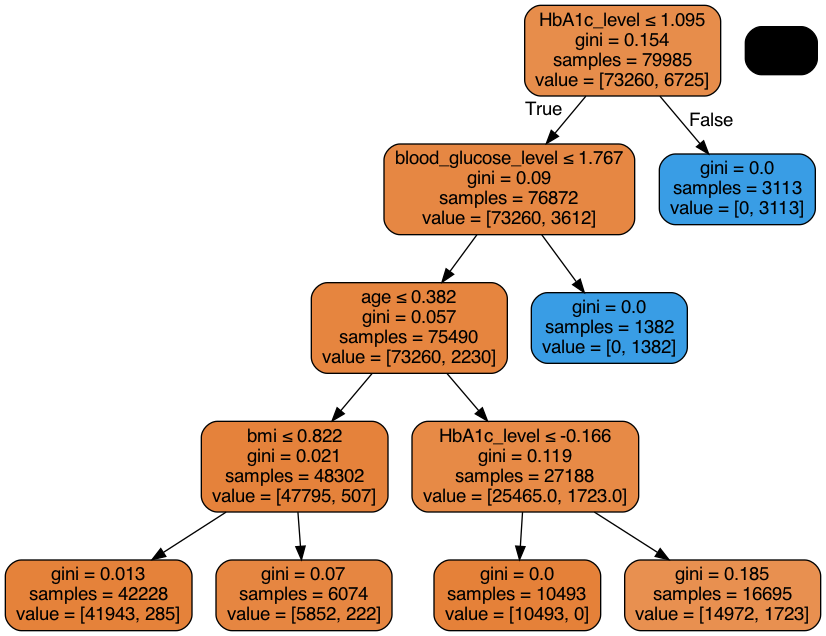

In [62]:
dot_data = StringIO()
export_graphviz(best_model, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())